In [46]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [47]:
import numpy as np
import pandas as pd

In [48]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [49]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [50]:
# reflect an existing database into a new model

##create a new AutomapBase clas susing automap_base()
base = automap_base()
##create engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [51]:
# reflect the tables
base.prepare(engine, reflect=True)

In [52]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [94]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station

In [95]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [96]:
# Collect the names of tables within the database
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [97]:
# Using the inspector to print the column names within the 'measurment' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [98]:
# Use `engine.execute` to select and display first 1000 rows from the Measurment table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [99]:
# Query measurment for `date`, `prcp` and save the query into results
measurement_prcp_results = session.query(Measurement.station,Measurement.date, Measurement.prcp).\
    order_by(Measurement.date.desc()).all()

measurement_prcp_results

[('USC00519397', '2017-08-23', 0.0),
 ('USC00514830', '2017-08-23', 0.0),
 ('USC00519523', '2017-08-23', 0.08),
 ('USC00516128', '2017-08-23', 0.45),
 ('USC00519397', '2017-08-22', 0.0),
 ('USC00519523', '2017-08-22', 0.0),
 ('USC00516128', '2017-08-22', 0.5),
 ('USC00519397', '2017-08-21', 0.0),
 ('USC00514830', '2017-08-21', 0.02),
 ('USC00519523', '2017-08-21', None),
 ('USC00516128', '2017-08-21', 0.56),
 ('USC00519397', '2017-08-20', 0.0),
 ('USC00514830', '2017-08-20', 0.01),
 ('USC00516128', '2017-08-20', None),
 ('USC00519397', '2017-08-19', 0.0),
 ('USC00514830', '2017-08-19', 0.0),
 ('USC00519523', '2017-08-19', None),
 ('USC00516128', '2017-08-19', 0.09),
 ('USC00519397', '2017-08-18', 0.0),
 ('USC00514830', '2017-08-18', 0.0),
 ('USC00519281', '2017-08-18', 0.06),
 ('USC00516128', '2017-08-18', None),
 ('USC00514830', '2017-08-17', 0.0),
 ('USC00519523', '2017-08-17', 0.05),
 ('USC00519281', '2017-08-17', 0.01),
 ('USC00516128', '2017-08-17', 0.13),
 ('USC00514830', '2017-0

In [100]:
# Load the results into a pandas dataframe.
measurement_prcp_df = pd.DataFrame(measurement_prcp_results, columns=['station','date', 'prcp'])

measurement_prcp_df.set_index('date', inplace=True)

#measurement_prcp_df.count()
measurement_prcp_df

,station,prcp
date,,
2017-08-23,USC00519397,0.00
2017-08-23,USC00514830,0.00
2017-08-23,USC00519523,0.08
2017-08-23,USC00516128,0.45
2017-08-22,USC00519397,0.00
...,...,...
2010-01-01,USC00518838,0.21
2010-01-01,USC00519523,0.15
2010-01-01,USC00519281,0.15


In [101]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [102]:
# Use `engine.execute` to select and display all rows from the Station table
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [289]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
from sqlalchemy import extract
## Latest Date
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [104]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query to Date: ", query_date)

Query to Date:  2016-08-23


In [236]:
# Perform a query to retrieve the data and precipitation scores
last_12months_results = session.query(Measurement.date, Measurement.station, Measurement.prcp,Measurement.tobs ).\
    filter(Measurement.date > query_date).\
    order_by(Measurement.date).all()
last_12months_results

[('2016-08-24', 'USC00519397', 0.08, 79.0),
 ('2016-08-24', 'USC00513117', 2.15, 76.0),
 ('2016-08-24', 'USC00514830', 2.28, 80.0),
 ('2016-08-24', 'USC00517948', None, 78.0),
 ('2016-08-24', 'USC00519523', 1.22, 79.0),
 ('2016-08-24', 'USC00519281', 2.15, 77.0),
 ('2016-08-24', 'USC00516128', 1.45, 74.0),
 ('2016-08-25', 'USC00519397', 0.08, 80.0),
 ('2016-08-25', 'USC00513117', 0.08, 77.0),
 ('2016-08-25', 'USC00514830', 0.0, 81.0),
 ('2016-08-25', 'USC00517948', 0.0, 81.0),
 ('2016-08-25', 'USC00519523', 0.21, 80.0),
 ('2016-08-25', 'USC00519281', 0.06, 80.0),
 ('2016-08-25', 'USC00516128', 0.11, 77.0),
 ('2016-08-26', 'USC00519397', 0.0, 79.0),
 ('2016-08-26', 'USC00513117', 0.03, 78.0),
 ('2016-08-26', 'USC00514830', 0.02, 81.0),
 ('2016-08-26', 'USC00517948', 0.04, 81.0),
 ('2016-08-26', 'USC00519523', 0.0, 84.0),
 ('2016-08-26', 'USC00519281', 0.01, 80.0),
 ('2016-08-27', 'USC00519397', 0.0, 77.0),
 ('2016-08-27', 'USC00513117', 0.18, 73.0),
 ('2016-08-27', 'USC00514830', 0.02, 

In [240]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_12months_df = pd.DataFrame(last_12months_results, columns=['date','station', 'prcp','tobs'])

last_12months_df.set_index('date', inplace=True)

last_12months_df

,station,prcp,tobs
date,,,
2016-08-24,USC00519397,0.08,79.0
2016-08-24,USC00513117,2.15,76.0
2016-08-24,USC00514830,2.28,80.0
2016-08-24,USC00517948,NaN,78.0
2016-08-24,USC00519523,1.22,79.0
...,...,...,...
2017-08-22,USC00516128,0.50,76.0
2017-08-23,USC00519397,0.00,81.0
2017-08-23,USC00514830,0.00,82.0


In [241]:
# Sort the dataframe by date
last_12months_df=last_12months_df.sort_index()
last_12months_df

,station,prcp,tobs
date,,,
2016-08-24,USC00519397,0.08,79.0
2016-08-24,USC00513117,2.15,76.0
2016-08-24,USC00514830,2.28,80.0
2016-08-24,USC00517948,NaN,78.0
2016-08-24,USC00519523,1.22,79.0
...,...,...,...
2017-08-22,USC00516128,0.50,76.0
2017-08-23,USC00519397,0.00,81.0
2017-08-23,USC00514830,0.00,82.0


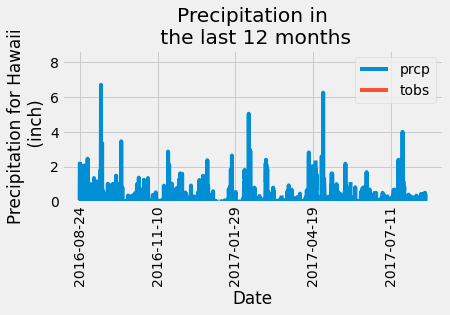

In [242]:
# Use Pandas Plotting with Matplotlib to plot the data
last_12months_df.plot(x_compat=True) 
plt.xticks(rotation='90')
plt.tight_layout()


# Set a Title and labels
plt.title("Precipitation in\n the last 12 months")
plt.xlabel("Date")
plt.ylabel("Precipitation for Hawaii\n (inch)")

# Set x and y limits
#plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(last_12months_df["prcp"])+2)
plt.show()

In [243]:
x_axis =last_12months_df.index
x_axis

Index(['2016-08-24', '2016-08-24', '2016-08-24', '2016-08-24', '2016-08-24',
       '2016-08-24', '2016-08-24', '2016-08-25', '2016-08-25', '2016-08-25',
       ...
       '2017-08-21', '2017-08-21', '2017-08-21', '2017-08-22', '2017-08-22',
       '2017-08-22', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23'],
      dtype='object', name='date', length=2223)

In [244]:
y_axis =last_12months_df.prcp
y_axis

date
2016-08-24    0.08
2016-08-24    2.15
2016-08-24    2.28
2016-08-24     NaN
2016-08-24    1.22
              ... 
2017-08-22    0.50
2017-08-23    0.00
2017-08-23    0.00
2017-08-23    0.08
2017-08-23    0.45
Name: prcp, Length: 2223, dtype: float64

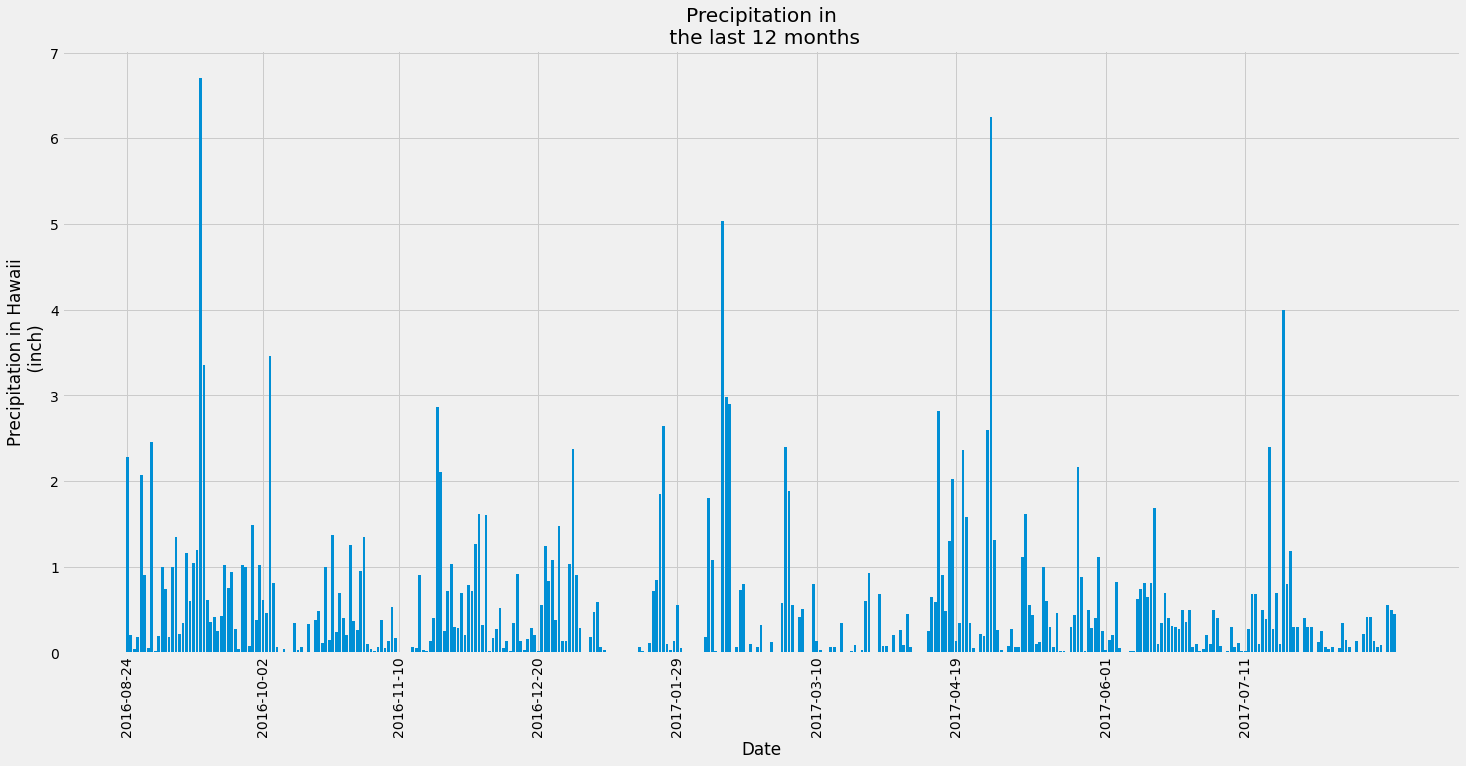

In [266]:

##Initialize the plot

## Create a Figure
fig = plt.figure(figsize=(20,10))


## Set up Axes
ax = fig.add_subplot(111)

##Plot the data

ax.bar(x_axis,y_axis)

plt.xticks(rotation='90')
plt.tight_layout()
ticks_to_use = last_12months_df.index[::250]
ax.set_xticks(ticks_to_use)

# Set a Title and labels
plt.title("Precipitation in\n the last 12 months")
plt.xlabel("Date")
plt.ylabel("Precipitation in Hawaii\n (inch)")


## Show the plot
plt.show()
#ax.get_xlim()


In [246]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_prcp_df.describe()


,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [247]:
last_12months_df.describe()

,prcp,tobs
count,2015.000000,2223.000000
mean,0.176462,74.578947
std,0.460288,4.612232
min,0.000000,58.000000
25%,0.000000,71.000000
50%,0.020000,75.000000
75%,0.130000,78.000000
max,6.700000,87.000000


###Station Analysis

In [248]:
# Design a query to show how many stations are available in this dataset?
#engine.execute('SELECT * FROM station').fetchall()
number_stations_from_Station = session.query(func.count(Station.station)).all()
number_stations_from_Station
print( "Numbers of stations : ", number_stations_from_Station)

Numbers of stations :  [(9,)]


In [249]:
number_stations_from_Measurement = session.query(Measurement).distinct(Measurement.station).group_by(Measurement.station).count()
number_stations_from_Measurement
print( "Numbers of distinct stations : ", number_stations_from_Measurement)

Numbers of distinct stations :  9


In [250]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
from sqlalchemy import desc

In [251]:

stations_and_counts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)
stations_and_counts =stations_and_counts.order_by(func.count(Measurement.station).desc()).all()
stations_and_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [252]:
print("The most active stations = USC00519281 ")

The most active stations = USC00519281 


In [253]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [254]:
stations_lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs)).group_by(Measurement.station).all()
stations_lowest_temp

[('USC00511918', 53.0),
 ('USC00513117', 59.0),
 ('USC00514830', 58.0),
 ('USC00516128', 58.0),
 ('USC00517948', 58.0),
 ('USC00518838', 58.0),
 ('USC00519281', 54.0),
 ('USC00519397', 56.0),
 ('USC00519523', 56.0)]

In [255]:
stations_lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs)).group_by(Measurement.station)
stations_lowest_temp =stations_lowest_temp.order_by(func.min(Measurement.tobs).desc()).all
stations_lowest_temp

<bound method Query.all of <sqlalchemy.orm.query.Query object at 0x000001A6112EE760>>

In [256]:
lowest_temp_USC00519281 = session.query(Measurement.station, func.min(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281')
lowest_temp_USC00519281
print("the lowest temperature recorded of the most active station:USC00519281")
for row in lowest_temp_USC00519281:
    print(row[0])
for column in lowest_temp_USC00519281:
    print(column[1])   

the lowest temperature recorded of the most active station:USC00519281
USC00519281
54.0


In [257]:
stations_highest_temp = session.query(Measurement.station, func.max(Measurement.tobs)).group_by(Measurement.station).all()
stations_highest_temp

[('USC00511918', 87.0),
 ('USC00513117', 85.0),
 ('USC00514830', 85.0),
 ('USC00516128', 84.0),
 ('USC00517948', 87.0),
 ('USC00518838', 83.0),
 ('USC00519281', 85.0),
 ('USC00519397', 87.0),
 ('USC00519523', 85.0)]

In [258]:
stations_highest_temp = session.query(Measurement.station, func.max(Measurement.tobs)).group_by(Measurement.station)
stations_highest_temp =stations_highest_temp.order_by(func.max(Measurement.tobs).desc()).all
stations_highest_temp

<bound method Query.all of <sqlalchemy.orm.query.Query object at 0x000001A6134B42E0>>

In [259]:
highest_temp_USC00519281 = session.query(Measurement.station, func.max(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281')
highest_temp_USC00519281
print("The highest temperature recorded of the most active station:USC00519281")
for row in highest_temp_USC00519281:
    print(row[0])
for column in highest_temp_USC00519281:
    print(column[1])   

The highest temperature recorded of the most active station:USC00519281
USC00519281
85.0


In [260]:
stations_average_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).group_by(Measurement.station).all()
stations_average_temp

[('USC00511918', 71.61596766043456),
 ('USC00513117', 72.68918420081211),
 ('USC00514830', 74.8732970027248),
 ('USC00516128', 70.91500765696784),
 ('USC00517948', 74.68440233236151),
 ('USC00518838', 72.72407045009784),
 ('USC00519281', 71.66378066378067),
 ('USC00519397', 74.55323054331865),
 ('USC00519523', 74.5436493068565)]

In [261]:
stations_average_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).group_by(Measurement.station)
stations_average_temp = stations_average_temp.order_by(func.avg(Measurement.tobs).desc()).all
stations_average_temp

<bound method Query.all of <sqlalchemy.orm.query.Query object at 0x000001A610E0DE80>>

In [262]:
average_temp_USC00519281 = session.query(Measurement.station, func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281')
average_temp_USC00519281
print("The highest temperature recorded of the most active station:USC00519281")
for row in average_temp_USC00519281:
    print(row[0])
for column in average_temp_USC00519281:
    print(column[1])   

The highest temperature recorded of the most active station:USC00519281
USC00519281
71.66378066378067


In [263]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# USC00519281

In [265]:
last_12mo_results_USC00519281 = session.query(Measurement.date, Measurement.station, Measurement.prcp,Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > query_date).\
    order_by(Measurement.date).all()
last_12mo_results_USC00519281

[('2016-08-24', 'USC00519281', 2.15, 77.0),
 ('2016-08-25', 'USC00519281', 0.06, 80.0),
 ('2016-08-26', 'USC00519281', 0.01, 80.0),
 ('2016-08-27', 'USC00519281', 0.12, 75.0),
 ('2016-08-28', 'USC00519281', 0.6, 73.0),
 ('2016-08-29', 'USC00519281', 0.35, 78.0),
 ('2016-08-30', 'USC00519281', 0.0, 77.0),
 ('2016-08-31', 'USC00519281', 0.24, 78.0),
 ('2016-09-01', 'USC00519281', 0.02, 80.0),
 ('2016-09-02', 'USC00519281', 0.01, 80.0),
 ('2016-09-03', 'USC00519281', 0.12, 78.0),
 ('2016-09-04', 'USC00519281', 0.14, 78.0),
 ('2016-09-05', 'USC00519281', 0.03, 78.0),
 ('2016-09-06', 'USC00519281', 0.11, 73.0),
 ('2016-09-07', 'USC00519281', 0.16, 74.0),
 ('2016-09-08', 'USC00519281', 0.07, 80.0),
 ('2016-09-09', 'USC00519281', 0.16, 79.0),
 ('2016-09-10', 'USC00519281', 0.09, 77.0),
 ('2016-09-11', 'USC00519281', 0.3, 80.0),
 ('2016-09-12', 'USC00519281', 0.31, 76.0),
 ('2016-09-13', 'USC00519281', 0.34, 79.0),
 ('2016-09-14', 'USC00519281', 2.33, 75.0),
 ('2016-09-15', 'USC00519281', 0.83

In [271]:
# Save the query results as a Pandas DataFrame 
last_12mo_results_USC00519281_df = pd.DataFrame(last_12mo_results_USC00519281, columns=['date','station', 'prcp','tobs'])

#last_12months_df.set_index('date', inplace=True)
last_12mo_results_USC00519281_df

,date,station,prcp,tobs
0,2016-08-24,USC00519281,2.15,77.0
1,2016-08-25,USC00519281,0.06,80.0
2,2016-08-26,USC00519281,0.01,80.0
3,2016-08-27,USC00519281,0.12,75.0
4,2016-08-28,USC00519281,0.60,73.0
...,...,...,...,...
346,2017-08-14,USC00519281,0.00,77.0
347,2017-08-15,USC00519281,0.32,77.0
348,2017-08-16,USC00519281,0.12,76.0
349,2017-08-17,USC00519281,0.01,76.0


In [283]:
x_value =last_12mo_results_USC00519281_df.date
y_value =last_12mo_results_USC00519281_df.tobs
y_value

0      77.0
1      80.0
2      80.0
3      75.0
4      73.0
       ... 
346    77.0
347    77.0
348    76.0
349    76.0
350    79.0
Name: tobs, Length: 351, dtype: float64

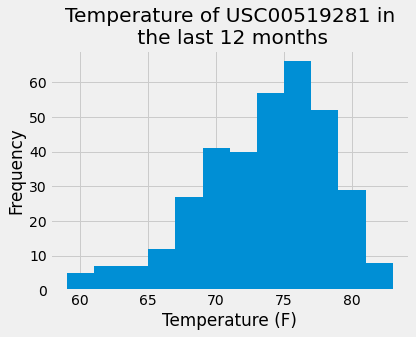

<Figure size 432x288 with 0 Axes>

In [287]:
last_12mo_results_USC00519281_df['tobs'].plot.hist(bins=12)
plt.tight_layout()

# Set a Title and labels
plt.title("Temperature of USC00519281 in\n the last 12 months")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")

plt.show()
plt.savefig('station_USC00519281temp.png')

## Bonus Challenge Assignment

In [288]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [296]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = query_date
end_date = last_date

def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
#print(calc_temps('2012-02-28', '2012-03-05'))

calc_temps('2016-08-23','2017-08-24')

[(58.0, 74.59058295964125, 87.0)]

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
